In [1]:
from sklearn.metrics import confusion_matrix,f1_score,r2_score

import numpy as np 



In [3]:
### XOR Classification

In [20]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])

In [21]:
np.random.seed(42)

In [22]:
input_size = 2 
hidden_size =2 
output_size = 1 

#### weights and bias intialization

In [23]:
W1 = np.random.randn(input_size,hidden_size) * 0.1 
b1 = np.zeros((1,hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.1 # weights for hidden to output
b2 = np.zeros((1, output_size))

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):

    return x * (1-x)


z  = np.array([[0.5,-0.5]])
a = sigmoid(z)
print("Sigmoid output:",a)
print("Sigmoid derivative ", sigmoid_derivative(a))

Sigmoid output: [[0.62245933 0.37754067]]
Sigmoid derivative  [[0.23500371 0.23500371]]


In [25]:


z1 = np.dot(X, W1) + b1         # Linear combination
a1 = sigmoid(z1)                # Activation

print("Hidden layer input (z1):\n", z1)
print("Hidden layer activation (a1):\n", a1)

# Output layer
z2 = np.dot(a1, W2) + b2        # Linear combination
a2 = sigmoid(z2)                # Activation

print("Output layer input (z2):\n", z2)
print("Output layer activation (a2):\n", a2)


Hidden layer input (z1):
 [[ 0.          0.        ]
 [ 0.06476885  0.15230299]
 [ 0.04967142 -0.01382643]
 [ 0.11444027  0.13847656]]
Hidden layer activation (a1):
 [[0.5        0.5       ]
 [0.51618656 0.53800232]
 [0.5124153  0.49654345]
 [0.52857888 0.53456392]]
Output layer input (z2):
 [[-0.02341452]
 [-0.0246833 ]
 [-0.02362429]
 [-0.02489297]]
Output layer activation (a2):
 [[0.49414664]
 [0.49382949]
 [0.4940942 ]
 [0.49377708]]


In [26]:
loss = np.mean((y-a2) ** 2)
print("Mean squared Error Loss:",loss)

Mean squared Error Loss: 0.25003649231448677


In [30]:
# Step 6: Backward pass (backpropagation)

# Output layer error and gradient
d_a2 = (a2 - y) * sigmoid_derivative(a2)      # error * derivative
d_W2 = np.dot(a1.T, d_a2)                     # gradient for W2
d_b2 = np.sum(d_a2, axis=0, keepdims=True)    # gradient for b2

# Hidden layer error and gradient
d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
d_W1 = np.dot(X.T, d_a1)                      # gradient for W1
d_b1 = np.sum(d_a1, axis=0, keepdims=True)    # gradient for b1

print("Gradient for W2:\n", d_W2)
print("Gradient for b2:\n", d_b2)
print("Gradient for W1:\n", d_W1)
print("Gradient for b1:\n", d_b1)

Gradient for W2:
 [[-0.00310929]
 [-0.00312365]]
Gradient for b2:
 [[-0.00603728]]
Gradient for W1:
 [[1.72812952e-05 1.85986316e-05]
 [1.73323412e-05 1.52037942e-05]]
Gradient for b1:
 [[3.20524433e-05 3.02837093e-05]]


In [31]:
learning_rate = 0.1

# Update output layer weights and biases
W2 -= learning_rate * d_W2
b2 -= learning_rate * d_b2

# Update hidden layer weights and biases
W1 -= learning_rate * d_W1
b1 -= learning_rate * d_b1

print("Updated W1:\n", W1)
print("Updated b1:\n", b1)
print("Updated W2:\n", W2)
print("Updated b2:\n", b2)

Updated W1:
 [[ 0.0496524  -0.01384714]
 [ 0.0647498   0.15228663]]
Updated b1:
 [[-3.48327994e-05 -3.25964489e-05]]
Updated W2:
 [[-0.02026867]
 [-0.02025327]]
Updated b2:
 [[0.00610854]]


In [32]:
hidden_activations = []
hidden_activations1 = []
W1_history = []
W2_history = []
def train_xor(X, y, W1, b1, W2, b2, epochs=10, lr=0.1):
    losses = []
    for epoch in range(epochs):
        # Forward pass
        W1_history.append(W1.copy())
        W2_history.append(W2.copy())
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        hidden_activations.append(a1.copy())
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        hidden_activations1.append(a2.copy())
        loss = np.mean((y - a2) ** 2)
        losses.append(loss)
        
        # Backward pass
        d_a2 = (a2 - y) * sigmoid_derivative(a2)
        d_W2 = np.dot(a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)
        d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
        d_W1 = np.dot(X.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)
        
        # Update weights and biases
        W2 -= lr * d_W2
        b2 -= lr * d_b2
        W1 -= lr * d_W1
        b1 -= lr * d_b1
        
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    return W1, b1, W2, b2, losses

# Usage
W1, b1, W2, b2, losses = train_xor(X, y, W1, b1, W2, b2, epochs=10, lr=0.1)
hidden_activations = np.array(hidden_activations)  # shape: (epochs, samples, hidden_size)
hidden_activations1 = np.array(hidden_activations1)  # shape: (epochs, samples, hidden_size)
W1_history = np.array(W1_history)
W2_history = np.array(W2_history)    

Epoch 1, Loss: 0.2500
Epoch 2, Loss: 0.2500
Epoch 3, Loss: 0.2500
Epoch 4, Loss: 0.2500
Epoch 5, Loss: 0.2500
Epoch 6, Loss: 0.2500
Epoch 7, Loss: 0.2500
Epoch 8, Loss: 0.2500
Epoch 9, Loss: 0.2500
Epoch 10, Loss: 0.2500


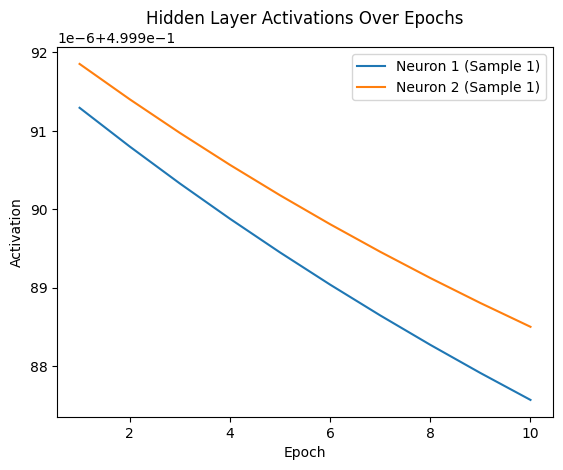

In [33]:
import matplotlib.pyplot as plt

for neuron in range(hidden_activations.shape[2]):
    plt.plot(range(1, len(hidden_activations)+1), hidden_activations[:, 0, neuron], label=f'Neuron {neuron+1} (Sample 1)')
plt.xlabel('Epoch')
plt.ylabel('Activation')
plt.title('Hidden Layer Activations Over Epochs')
plt.legend()
plt.show()

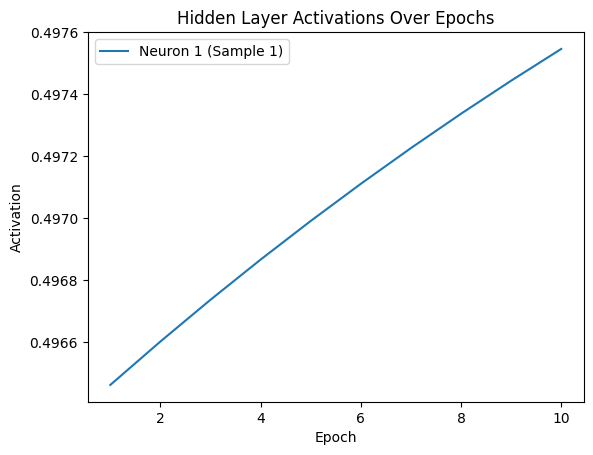

In [38]:
import matplotlib.pyplot as plt

for neuron in range(hidden_activations1.shape[2]):
    plt.plot(range(1, len(hidden_activations1)+1), hidden_activations1[:, 0, neuron], label=f'Neuron {neuron+1} (Sample 1)')
plt.xlabel('Epoch')
plt.ylabel('Activation')
plt.title('Hidden Layer Activations Over Epochs')
plt.legend()
plt.show()

In [34]:
def predict(X, W1, b1, W2, b2):
    # Forward pass only
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a2

# After training, use:
predictions = predict(X, W1, b1, W2, b2)
print("Predictions (raw):\n", predictions)
print("Predictions (rounded):\n", np.round(predictions))
print("True labels:\n", y)

Predictions (raw):
 [[0.49764527]
 [0.49739275]
 [0.49760353]
 [0.49735104]]
Predictions (rounded):
 [[0.]
 [0.]
 [0.]
 [0.]]
True labels:
 [[0]
 [1]
 [1]
 [0]]


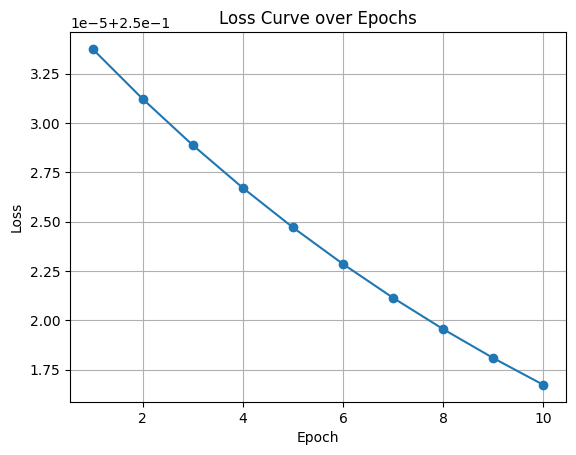

In [18]:
import matplotlib.pyplot as plt

# losses is returned from train_xor
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve over Epochs')
plt.grid(True)
plt.show()

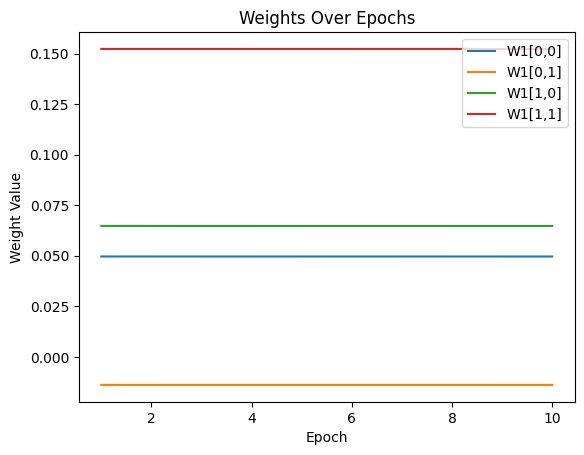

In [35]:
for i in range(W1_history.shape[1]):
    for j in range(W1_history.shape[2]):
        plt.plot(range(1, len(W1_history)+1), W1_history[:, i, j], label=f'W1[{i},{j}]')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weights Over Epochs')
plt.legend()
plt.show()

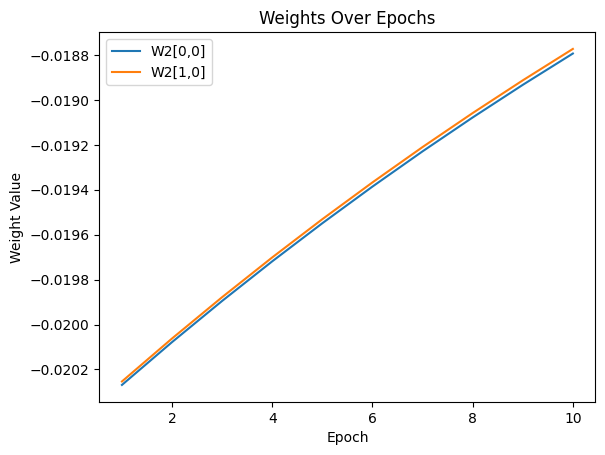

In [37]:
for i in range(W2_history.shape[1]):
    for j in range(W2_history.shape[2]):
        plt.plot(range(1, len(W2_history)+1), W2_history[:, i, j], label=f'W2[{i},{j}]')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weights Over Epochs')
plt.legend()
plt.show()